In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("cars24.csv")

In [3]:
df.head()

,Unnamed: 0,name,selling_price,km_driven,fuel,transmission
0,0,2013 Toyota Innova,"6,85,199","55,587 km",Diesel,Manual
1,1,2016 Ford Ecosport,"6,31,899","90,171 km",Diesel,Manual
2,2,2015 Maruti Swift,"3,94,799","68,025 km",Petrol,Manual
3,3,2016 Maruti Vitara Brezza,"6,78,399","92,569 km",Diesel,Manual
4,4,2016 Maruti Vitara Brezza,"6,78,399","92,569 km",Diesel,Manual


In [4]:
df.drop(['Unnamed: 0'],axis=1)

,name,selling_price,km_driven,fuel,transmission
0,2013 Toyota Innova,"6,85,199","55,587 km",Diesel,Manual
1,2016 Ford Ecosport,"6,31,899","90,171 km",Diesel,Manual
2,2015 Maruti Swift,"3,94,799","68,025 km",Petrol,Manual
3,2016 Maruti Vitara Brezza,"6,78,399","92,569 km",Diesel,Manual
4,2016 Maruti Vitara Brezza,"6,78,399","92,569 km",Diesel,Manual
...,...,...,...,...,...
2566,2019 Maruti Vitara Brezza,"8,16,899","18,028 km",Diesel,Manual
2567,2017 Maruti Ciaz,"6,07,099","66,396 km",Diesel,Manual
2568,2015 Toyota Etios,"5,02,399","77,530 km",Diesel,Manual
2569,2016 Hyundai Creta,"8,27,899","78,878 km",Diesel,Manual


In [5]:
df.shape

(2571, 6)

In [6]:
df.isnull().sum()

Unnamed: 0         0
name               0
selling_price      0
km_driven          0
fuel               0
transmission     255
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Unnamed: 0         0
name               0
selling_price      0
km_driven          0
fuel               0
transmission     255
dtype: int64

In [9]:
df['fuel'].value_counts()

Diesel    1328
Petrol    1240
-            3
Name: fuel, dtype: int64

In [10]:
df['transmission'].value_counts()

Manual       2114
Automatic     199
-               3
Name: transmission, dtype: int64

### EDA- Exploratory Data analysis

In [11]:
dfcorr=df.corr()

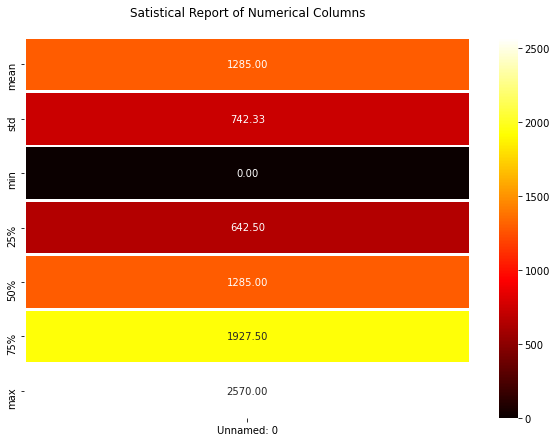

In [12]:
plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

<AxesSubplot:>

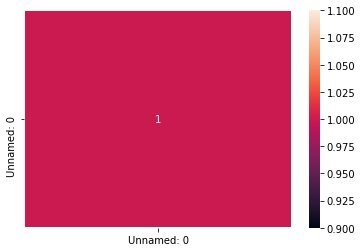

In [13]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

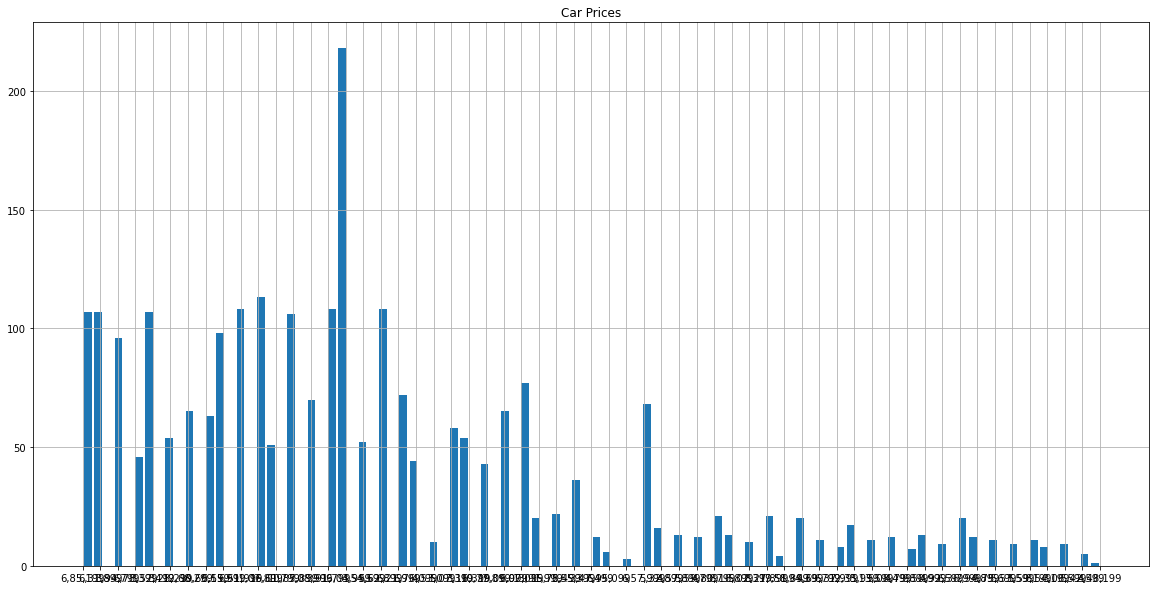

In [14]:
df['selling_price'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.title('Car Prices')
plt.show()

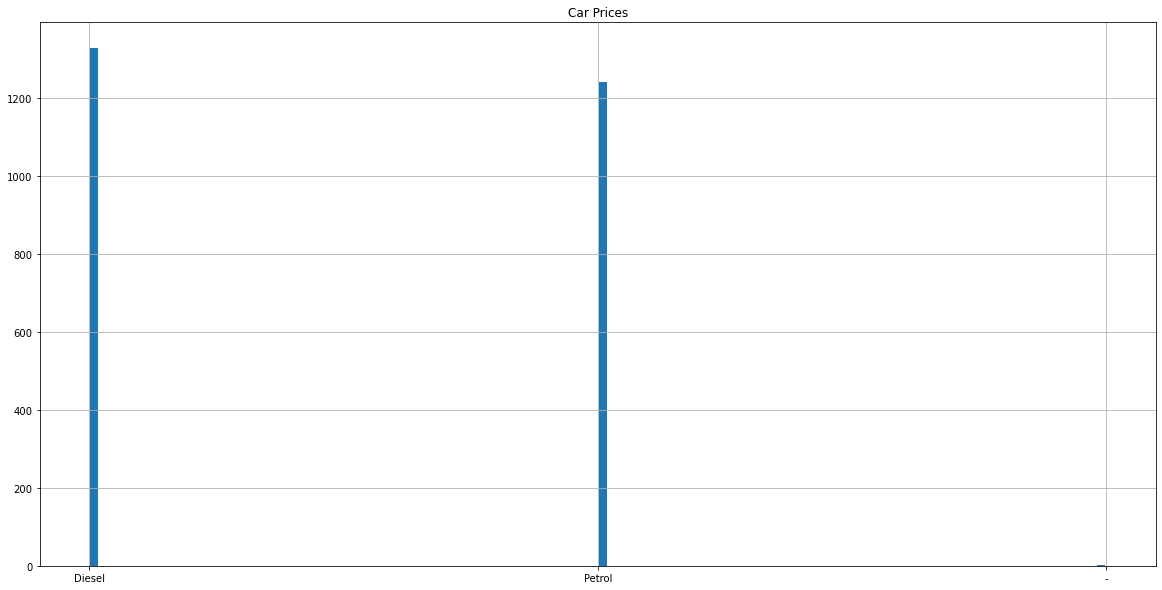

In [15]:
df['fuel'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.title('Car Prices')
plt.show()

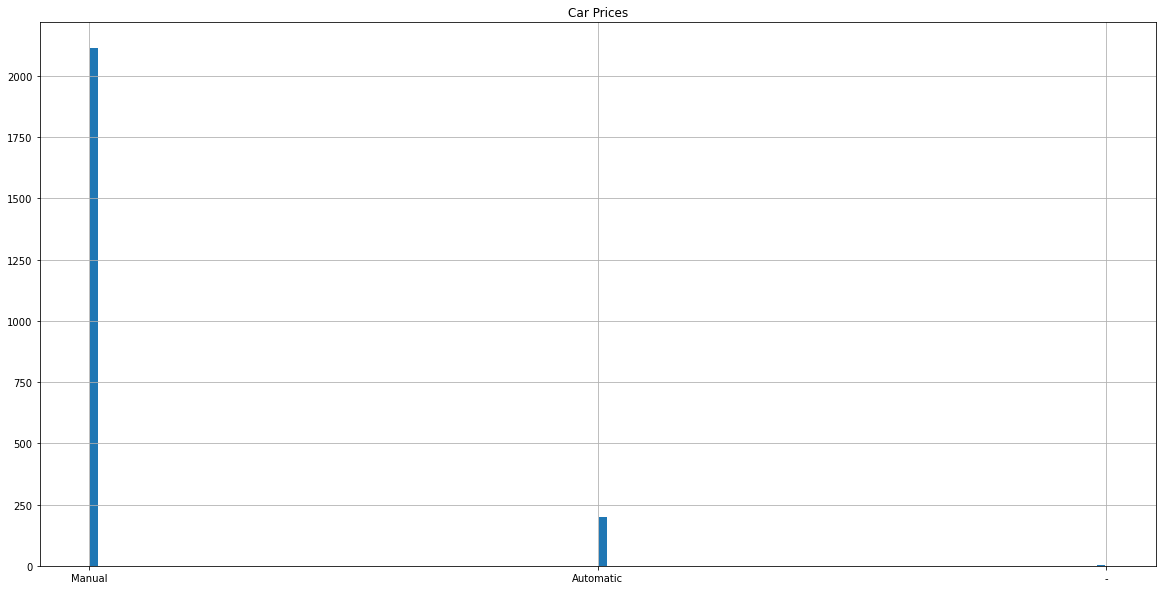

In [16]:
df['transmission'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.title('Car Prices')
plt.show()


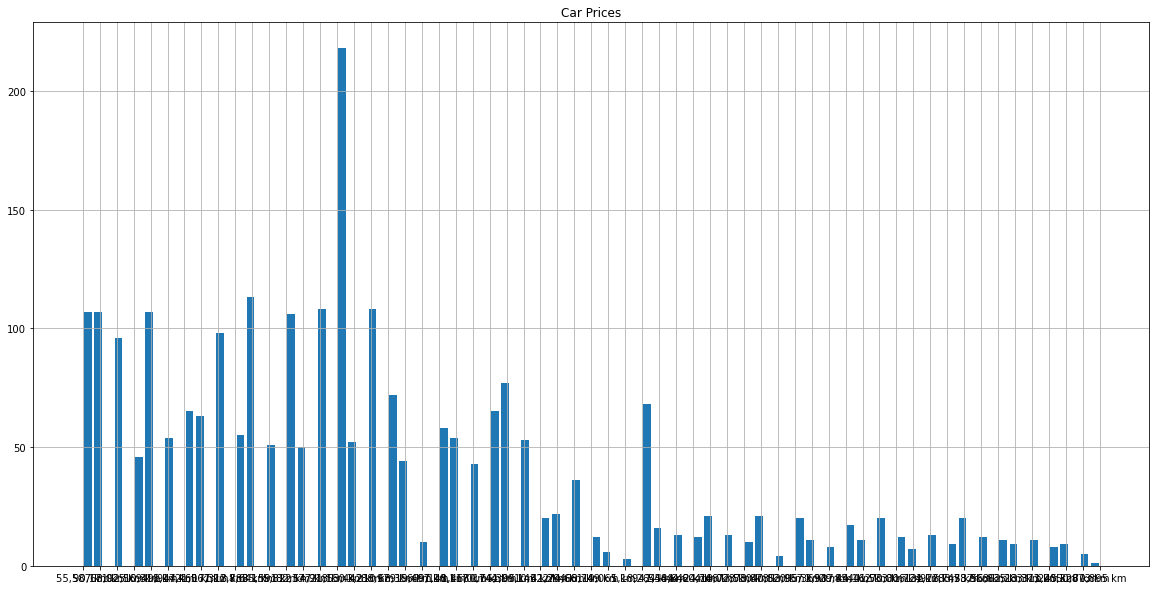

In [17]:
df['km_driven'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.title('Car Prices')
plt.show()

In [50]:
df.describe(include="all")

,Unnamed: 0,name,selling_price,km_driven,fuel,transmission
count,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000
mean,1285.000000,26.644496,26.032283,30.706729,1.481136,2.019448
std,742.328095,15.053227,16.784400,17.681388,0.502072,0.425376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,642.500000,14.000000,9.000000,17.000000,1.000000,2.000000
50%,1285.000000,24.000000,23.000000,33.000000,1.000000,2.000000
75%,1927.500000,42.000000,42.000000,45.000000,2.000000,2.000000
max,2570.000000,50.000000,58.000000,60.000000,2.000000,3.000000


### Using LabelEncoder for convering categorical to numerical

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2571 non-null   int64 
 1   name           2571 non-null   object
 2   selling_price  2571 non-null   object
 3   km_driven      2571 non-null   object
 4   fuel           2571 non-null   object
 5   transmission   2316 non-null   object
dtypes: int64(1), object(5)
memory usage: 120.6+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()
df['name'] = encoder.fit_transform(df['name'])
df['selling_price'] = encoder.fit_transform(df['selling_price'])
df['km_driven'] = encoder.fit_transform(df['km_driven'])
df['fuel'] = encoder.fit_transform(df['fuel'])
df['transmission'] = encoder.fit_transform(df['transmission'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     2571 non-null   int64
 1   name           2571 non-null   int32
 2   selling_price  2571 non-null   int32
 3   km_driven      2571 non-null   int32
 4   fuel           2571 non-null   int32
 5   transmission   2571 non-null   int32
dtypes: int32(5), int64(1)
memory usage: 70.4 KB


All columns are converted into numerical now

### Dividing data into X and Y

In [22]:
x=df.drop(['selling_price'],axis=1)
y=df['selling_price']

In [23]:
x.shape

(2571, 5)

In [24]:
y.shape

(2571,)

#### scaling X values

In [25]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [26]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [27]:
pd.DataFrame(x).describe()

,0,1,2,3,4
count,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000
mean,0.500000,0.532890,0.511779,0.740568,0.673149
std,0.288844,0.301065,0.294690,0.251036,0.141792
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.280000,0.283333,0.500000,0.666667
50%,0.500000,0.480000,0.550000,0.500000,0.666667
75%,0.750000,0.840000,0.750000,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000


all the data have been scaled.

### Spliting Train and Test data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [30]:
x_train.shape

(1876, 5)

In [31]:
x_test.shape

(695, 5)

In [32]:
y_train.shape

(1876,)

In [33]:
y_test.shape

(695,)

### Model building

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9997600194864115


In [36]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.04806302158273381
MAE: 0.030100719424460444
r2_score: 0.9998257320271681


### DECISION TREE CLASSIFIER

In [37]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [38]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.0
MAE: 0.0
r2_score: 1.0


### Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9906328768026449


In [40]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 2.654903351265137
MAE: 1.0807302021653329
r2_score: 0.9895008349190175


### cross validation

In [41]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
            
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 224.368489, 10.931539
RF    : 0.343469, 0.556873
DTR    : 0.089883, 0.229845
GBR    : 3.004083, 1.637852


### HYPER PARAMETER TUNING:

##### Grid Search CV

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [43]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [44]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [45]:
GCV.best_params_

{'criterion': 'mae',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [46]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =2, n_estimators = 150, criterion='mse')
mod.fit(x_train,y_train)
pred = mod.predict(x_test)
mod.score(x_test,y_test)

0.999856911150653

In [47]:
scr = cross_val_score(mod, x,y, cv=4)
print(scr.mean())

0.9960177933015557


### saving the model

In [48]:
import joblib

In [49]:
joblib.dump(GCV,'car_price_prediction.obj')

['car_price_prediction.obj']